In [ ]:
# !pip install -r requirements.txt

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import font_manager
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('A_stat_data_112.csv')
df2 = df.copy()

In [3]:
df_DiffAndPass = df2[['first_correct_rate', 'mission_difficulty']].dropna()
df_DiffAndPass.head()

,first_correct_rate,mission_difficulty
10,0.0,易
11,0.4,中
40,0.2,難
64,0.2,難
65,0.4,難


# 資料預處理

In [4]:
df = pd.read_csv('A_stat_data_112.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909959 entries, 0 to 1909958
Data columns (total 22 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   grade                                 int64  
 1   mission_name                          object 
 2   mission_difficulty                    object 
 3   mission_field                         object 
 4   mission_type                          object 
 5   mission_semester_year                 int64  
 6   mission_semester                      object 
 7   mission_datetime_utc8                 object 
 8   mission_status                        object 
 9   is_completed                          int64  
 10  completed_at_utc8                     object 
 11  correct_rate                          float64
 12  answer_duration_sec                   float64
 13  mission_answer_count                  int64  
 14  content_indicator_correct_rate        float64
 15  comprehensive_i

In [5]:
df_g=df["grade"]
df["grade"].describe()

count    1.909959e+06
mean     5.949924e+00
std      1.586873e+00
min      4.000000e+00
25%      5.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      9.000000e+00
Name: grade, dtype: float64

In [6]:
df_m=df["mission_difficulty"]
df["mission_difficulty"].describe()

count     1820186
unique          3
top             中
freq      1030200
Name: mission_difficulty, dtype: object

In [7]:
df_f=df["first_correct_rate"]
df["first_correct_rate"].describe()

count    473392.000000
mean          0.451405
std           0.316127
min           0.000000
25%           0.200000
50%           0.400000
75%           0.600000
max           1.000000
Name: first_correct_rate, dtype: float64

In [8]:
df_a=df["answer_duration_sec"]
df["answer_duration_sec"].describe()

count    453620.000000
mean        147.150187
std         328.610611
min           1.000000
25%          10.000000
50%          37.000000
75%         176.000000
max        3600.000000
Name: answer_duration_sec, dtype: float64

In [9]:
print("grade =",df_g.isnull().sum())
print("mission_difficulty =",df_m.isnull().sum())
print("first_correct_rate =",df_f.isnull().sum())
print("answer_duration_sec =",df_a.isnull().sum())

grade = 0
mission_difficulty = 89773
first_correct_rate = 1436567
answer_duration_sec = 1456339


# 刪除缺失值

In [10]:
df_combined = pd.DataFrame({
    'grade': df['grade'],
    'mission_difficulty': df['mission_difficulty'],
    'first_correct_rate': df['first_correct_rate'],
    'answer_duration_sec': df['answer_duration_sec']
})
df_combined.dropna( )

,grade,mission_difficulty,first_correct_rate,answer_duration_sec
10,5,易,0.0,10.0
11,5,中,0.4,31.0
40,5,難,0.2,15.0
64,7,難,0.2,6.0
65,7,難,0.4,11.0
...,...,...,...,...
1909904,7,難,0.4,7.0
1909905,7,易,0.2,8.0
1909909,7,難,0.0,15.0
1909913,7,易,0.2,6.0


# 困難題圖形

In [11]:
df = pd.read_csv('A_stat_data_112.csv')
df2 = df.copy()

In [12]:
df_DiffAndPass = df2[['first_correct_rate', 'mission_difficulty']].dropna()
df_DiffAndPass.head()
df_DiffAndPass.to_csv("DiffAndPass.csv", index=False)


df_DiffAndPass.head()

,first_correct_rate,mission_difficulty
10,0.0,易
11,0.4,中
40,0.2,難
64,0.2,難
65,0.4,難


In [13]:
# 定義一個函數來轉換難度等級
def translate_difficulty(difficulty):
    if difficulty == "易":
        return "Easy"
    elif difficulty == "中":
        return "Medium"
    elif difficulty == "難":
        return "Hard"
    else:
        return difficulty  # 如果遇到未知的值，保持原樣

# 使用 apply 函數應用到 mission_difficulty 欄位
df_DiffAndPass["mission_difficulty"] = df_DiffAndPass["mission_difficulty"].apply(translate_difficulty)

# 查看結果
df_DiffAndPass.head()

,first_correct_rate,mission_difficulty
10,0.0,Easy
11,0.4,Medium
40,0.2,Hard
64,0.2,Hard
65,0.4,Hard


In [14]:
df_hard = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("Hard", na=False)]
df_hard.tail()
LensOfHard = len(df_hard)

# 計算 first_correct_rate 每個值的出現次數
rate_counts = df_hard['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# 按 first_correct_rate 數值排序
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# 計算 first_correct_rate 的平均值
mean_rate = df_hard['first_correct_rate'].mean()
mean_rate_hard = mean_rate
# 繪製長條圖
fig = px.bar(rate_counts, x='first_correct_rate', y='count',
             title="First Correct Rate (Hard)",
             labels={'first_correct_rate': 'First Correct Rate', 'count': '出現次數'})

# 加入平均線
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="平均線",
                         line=dict(color="red", dash="dash")))

# 更新圖表的標籤
fig.update_layout(yaxis_title="出現次數", xaxis_title="First Correct Rate")
fig.show()

# 中等題圖形

In [15]:
df_mid = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("Medium", na=False)]
df_mid.tail()
LensOfMid = len(df_mid)

In [16]:
# 計算 first_correct_rate 每個值的出現次數
rate_counts = df_mid['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# 按 first_correct_rate 數值排序
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# 計算 first_correct_rate 的平均值
mean_rate = df_mid['first_correct_rate'].mean()
mean_rate_mid = mean_rate
# 繪製長條圖
fig = px.bar(rate_counts, x='first_correct_rate', y='count',
             title="First Correct Rate (Medium)",
             labels={'first_correct_rate': 'First Correct Rate', 'count': '出現次數'})

# 加入平均線
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="平均線",
                         line=dict(color="red", dash="dash")))

# 更新圖表的標籤
fig.update_layout(yaxis_title="出現次數", xaxis_title="First Correct Rate")
fig.show()

# 簡易題圖形

In [17]:
df_easy = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("Easy", na=False)]
df_easy.tail()
LensOfEasy = len(df_easy)

In [18]:
# 計算 first_correct_rate 每個值的出現次數
rate_counts = df_easy['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# 按 first_correct_rate 數值排序
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# 計算 first_correct_rate 的平均值
mean_rate = df_easy['first_correct_rate'].mean()
mean_rate_ez = mean_rate
# 繪製長條圖
fig = px.bar(rate_counts, x='first_correct_rate', y='count',
             title="First Correct Rate (Easy)",
             labels={'first_correct_rate': 'First Correct Rate', 'count': '出現次數'})

# 加入平均線
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="平均線",
                         line=dict(color="red", dash="dash")))

# 更新圖表的標籤
fig.update_layout(yaxis_title="出現次數", xaxis_title="First Correct Rate")
fig.show()

In [19]:
print(mean_rate_ez)
print(mean_rate_mid)
print(mean_rate_hard)
#print(LensOfEasy,LensOfMid,LensOfHard)

0.47508006578377904
0.4534720475411898
0.43858718797653556


# ANOVA分析

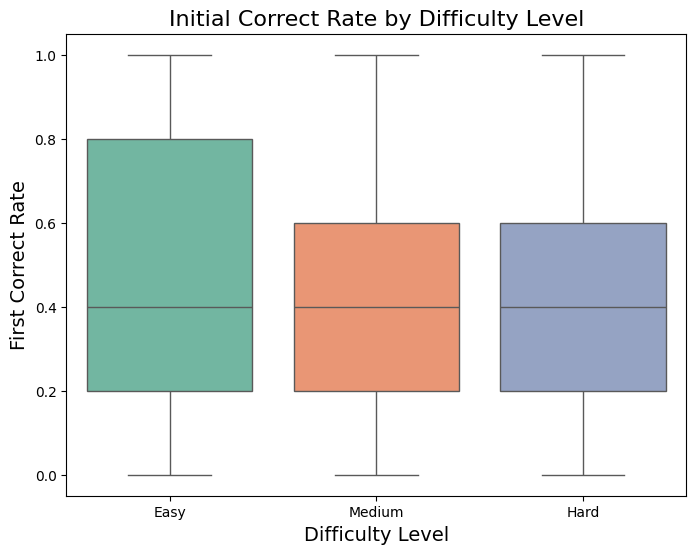

ANOVA p-value: 1.2003713636168536e-148


In [20]:
# 資料
data = df_DiffAndPass

# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")

# 中等與簡單題目之ANOVA

In [21]:
df_EasyAndMid = df_DiffAndPass[
    (df_DiffAndPass["mission_difficulty"] == "Medium") |
    (df_DiffAndPass["mission_difficulty"] == "Easy")
]

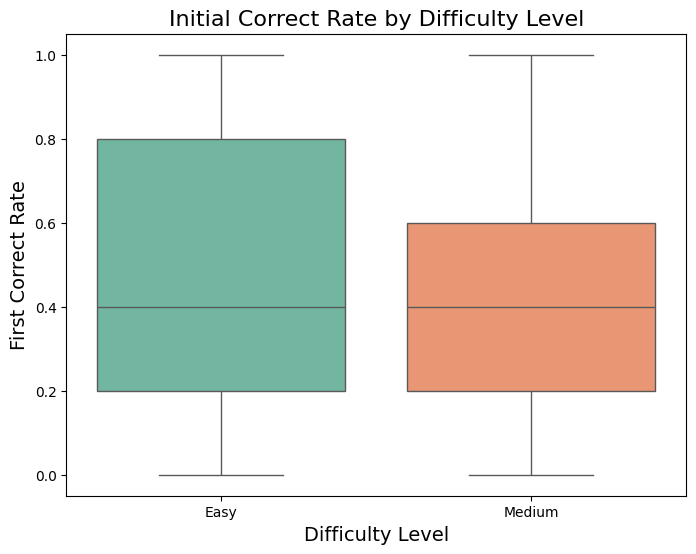

ANOVA p-value: 3.2033224681677758e-86


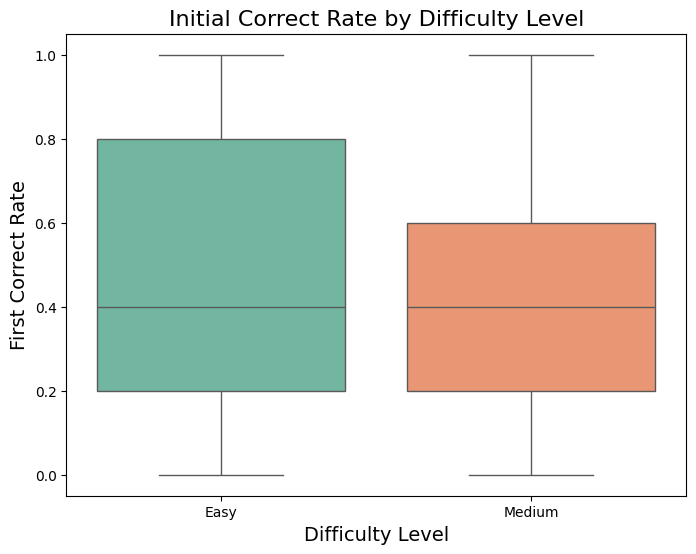

ANOVA p-value: 3.2033224681677758e-86


In [22]:
# 資料
data = df_EasyAndMid
# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")# 資料
data = df_EasyAndMid
# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")

# 中等與困難題目之ANOVA

In [23]:
df_MidAndHard = df_DiffAndPass[
    (df_DiffAndPass["mission_difficulty"] == "Medium") |
    (df_DiffAndPass["mission_difficulty"] == "Hard")
]

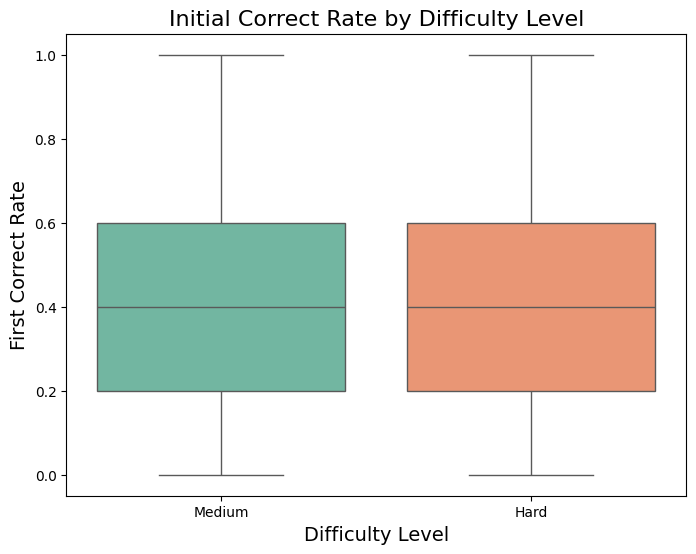

ANOVA p-value: 8.284437395450216e-29


In [24]:
# 資料
data = df_MidAndHard

# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")

# 簡單與困難題目之ANOVA分析

In [25]:
df_EasyAndHard = df_DiffAndPass[
    (df_DiffAndPass["mission_difficulty"] == "Easy") |
    (df_DiffAndPass["mission_difficulty"] == "Hard")
]

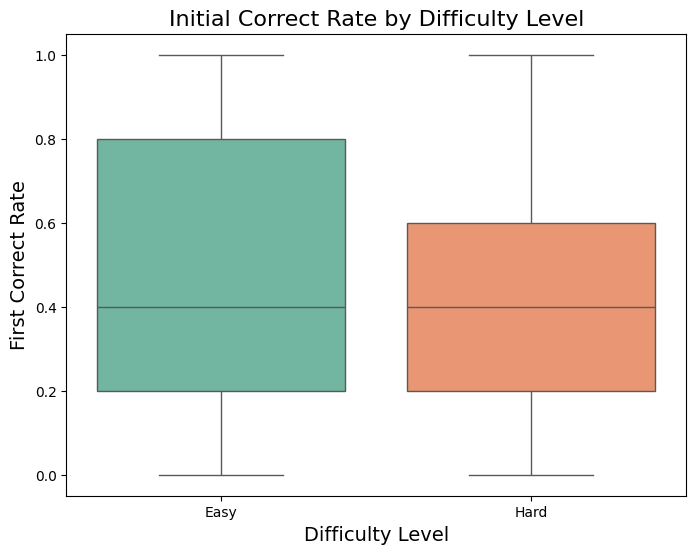

ANOVA p-value: 6.359809504261657e-133


In [26]:
# 資料
data = df_EasyAndHard

# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, hue='mission_difficulty', palette='Set2', legend=False)
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")

# 成績部分

In [27]:
df = pd.read_csv('A_stat_data_112.csv')
df2 = df.copy()

df_DiffAndPass = df2[['first_correct_rate', 'mission_difficulty','grade']].dropna()

# 定義一個函數來轉換難度等級
def translate_difficulty(difficulty):
    if difficulty == "易":
        return "Easy"
    elif difficulty == "中":
        return "Medium"
    elif difficulty == "難":
        return "Hard"
    else:
        return difficulty  # 如果遇到未知的值，保持原樣

# 使用 apply 函數應用到 mission_difficulty 欄位
df_DiffAndPass["mission_difficulty"] = df_DiffAndPass["mission_difficulty"].apply(translate_difficulty)

不同的年級有： [4 5 6 7 8 9]


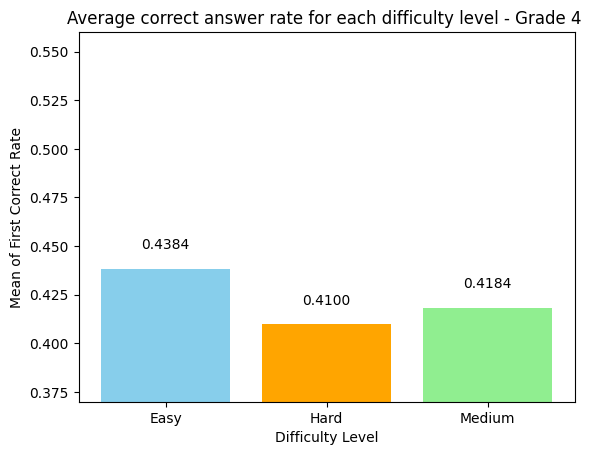

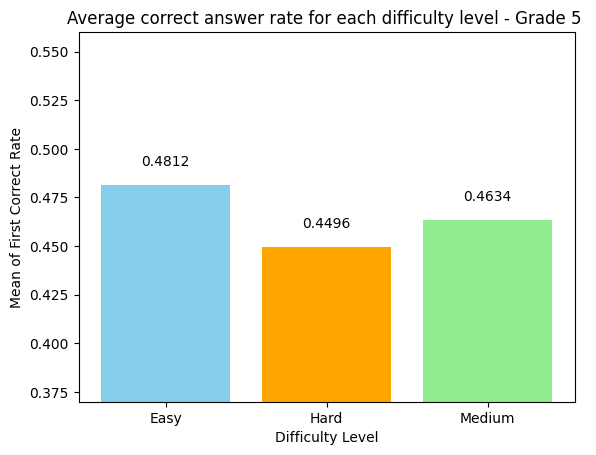

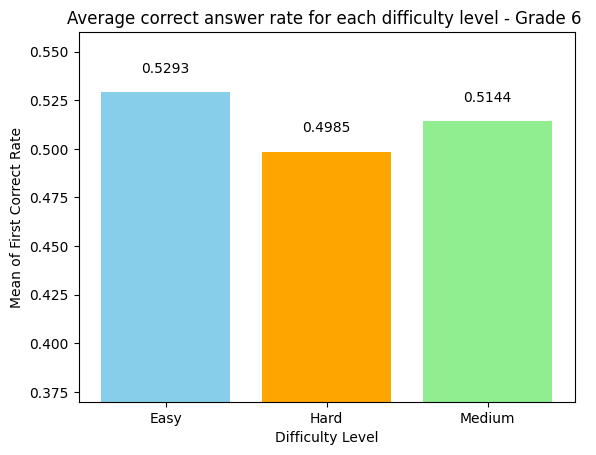

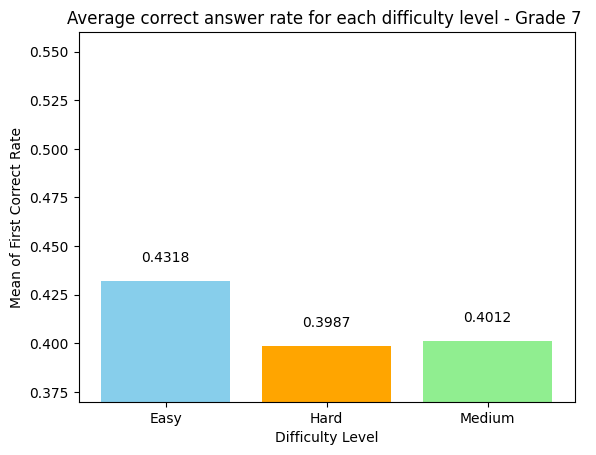

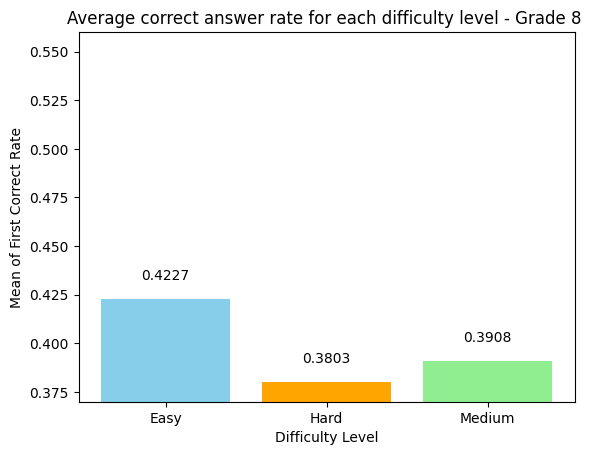

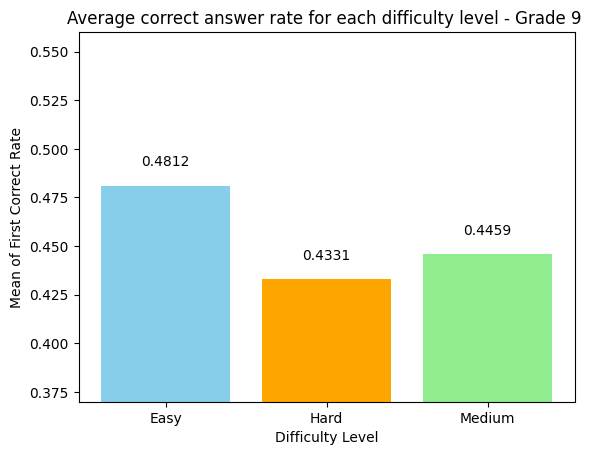

In [28]:
unique_grades = df_DiffAndPass['grade'].unique()
unique_grades.sort()
print("不同的年級有：", unique_grades)

df_grades = {}

# 遍歷年級列表，生成對應的 DataFrame
for grade in unique_grades:
    df_grades[f"Grade {grade}"] = df_DiffAndPass[df_DiffAndPass['grade'] == grade]


for grade, df in df_grades.items():
    # 計算每個難度的 first_correct_rate 平均值
    avg_correct_rate = df.groupby('mission_difficulty')['first_correct_rate'].mean()

    # 繪製柱狀圖
    plt.bar(avg_correct_rate.index, avg_correct_rate.values, color=['skyblue', 'orange', 'lightgreen'])
    plt.title(f"Average correct answer rate for each difficulty level - {grade} ")
    plt.xlabel("Difficulty Level")
    plt.ylabel("Mean of First Correct Rate")

    # 設定 y 軸的範圍 0.37 到 0.56
    plt.ylim(0.37, 0.56)

    # 顯示每個柱狀圖的精確值
    for i, v in enumerate(avg_correct_rate):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center')  # 小數點保留後四位

    plt.show()

不同的年級有： [4 5 6 7 8 9]
不同的難度有： ['Easy' 'Hard' 'Medium']

ANOVA 結果：
       難度          F值             p值
0    Easy  342.451446   0.000000e+00
1    Hard  211.981689  2.871142e-225
2  Medium  851.852150   0.000000e+00


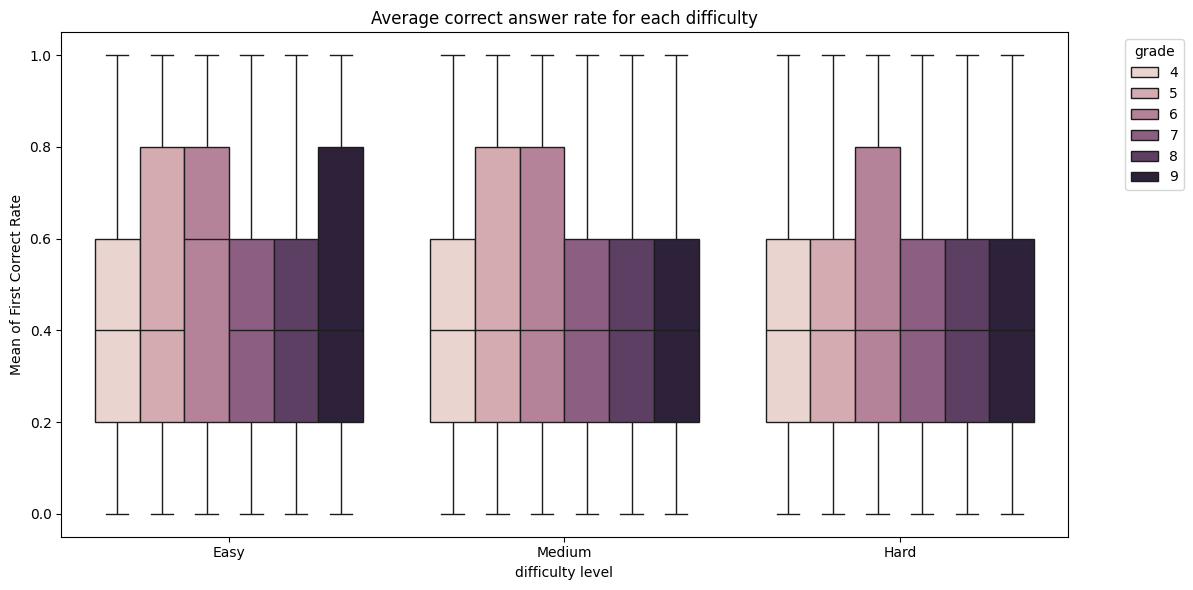

In [29]:

df = pd.read_csv('A_stat_data_112.csv')
df2 = df.copy()

df_DiffAndPass = df2[['first_correct_rate', 'mission_difficulty','grade']].dropna()

# 定義一個函數來轉換難度等級
def translate_difficulty(difficulty):
    if difficulty == "易":
        return "Easy"
    elif difficulty == "中":
        return "Medium"
    elif difficulty == "難":
        return "Hard"
    else:
        return difficulty  # 如果遇到未知的值，保持原樣

# 使用 apply 函數應用到 mission_difficulty 欄位
df_DiffAndPass["mission_difficulty"] = df_DiffAndPass["mission_difficulty"].apply(translate_difficulty)

# 獲取唯一的年級和難度
unique_grades = df_DiffAndPass['grade'].unique()
unique_grades.sort()
unique_difficulties = df_DiffAndPass['mission_difficulty'].unique()
unique_difficulties.sort()

print("不同的年級有：", unique_grades)
print("不同的難度有：", unique_difficulties)

# 使用 ANOVA 比較每個年級在不同難度上的首次答題率差異
anova_results = []
for difficulty in unique_difficulties:
    # 按照難度過濾數據
    data_by_difficulty = df_DiffAndPass[df_DiffAndPass['mission_difficulty'] == difficulty]

    # 準備每個年級的數據
    data_by_grade = [data_by_difficulty[data_by_difficulty['grade'] == grade]['first_correct_rate']
                     for grade in unique_grades]

    # 執行 ANOVA 測試
    f_stat, p_value = f_oneway(*data_by_grade)
    anova_results.append({'難度': difficulty, 'F值': f_stat, 'p值': p_value})

# 將 ANOVA 結果輸出為表格
anova_df = pd.DataFrame(anova_results)
print("\nANOVA 結果：")
print(anova_df)

# 繪製箱型圖以視覺化數據分佈
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_DiffAndPass, x='mission_difficulty', y='first_correct_rate', hue='grade')
plt.title('Average correct answer rate for each difficulty')
plt.xlabel('difficulty level')
plt.ylabel('Mean of First Correct Rate')
plt.legend(title='grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


不同的年級有： [4 5 6 7 8 9]
不同的難度有： ['Easy' 'Hard' 'Medium']

ANOVA 結果：
       難度          F值             p值 顯著性
0    Easy  342.451446   0.000000e+00  顯著
1    Hard  211.981689  2.871142e-225  顯著
2  Medium  851.852150   0.000000e+00  顯著


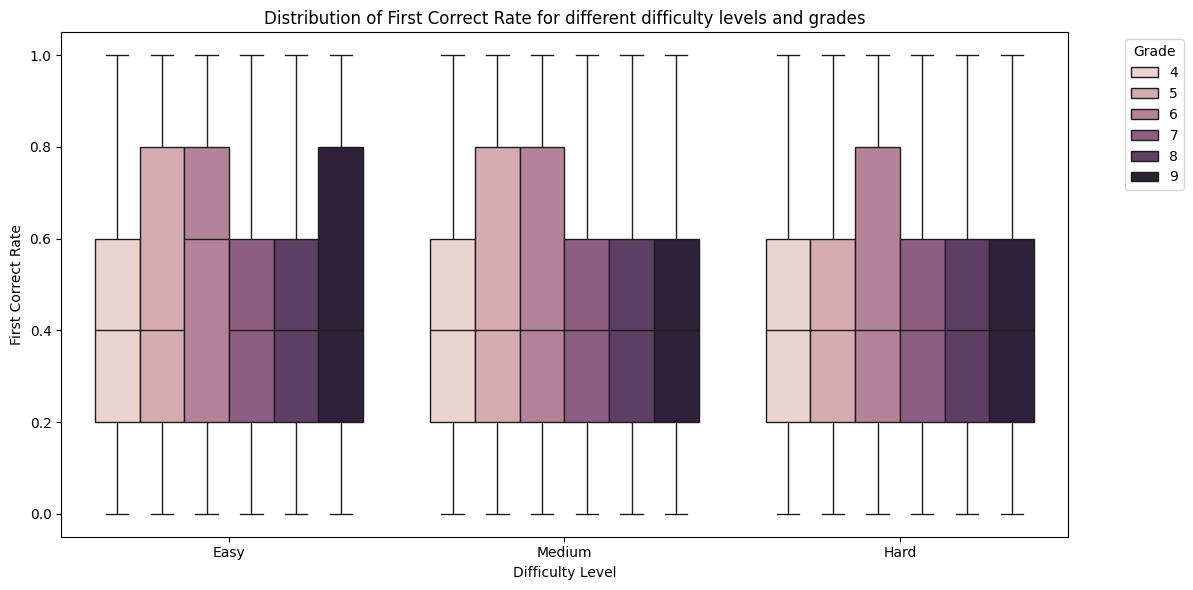

In [30]:
# 獲取唯一的年級和難度
unique_grades = df_DiffAndPass['grade'].unique()
unique_grades.sort()
unique_difficulties = df_DiffAndPass['mission_difficulty'].unique()
unique_difficulties.sort()

print("不同的年級有：", unique_grades)
print("不同的難度有：", unique_difficulties)

# 使用 ANOVA 比較每個年級在不同難度上的首次答題率差異
anova_results = []
alpha = 0.05  # 顯著性水準

for difficulty in unique_difficulties:
    # 按照難度過濾數據
    data_by_difficulty = df_DiffAndPass[df_DiffAndPass['mission_difficulty'] == difficulty]

    # 準備每個年級的數據
    data_by_grade = [
        data_by_difficulty[data_by_difficulty['grade'] == grade]['first_correct_rate']
        for grade in unique_grades
    ]

    # 執行 ANOVA 測試
    f_stat, p_value = f_oneway(*data_by_grade)

    # 判斷顯著性
    significant = "顯著" if p_value < alpha else "不顯著"

    # 儲存結果
    anova_results.append({
        '難度': difficulty,
        'F值': f_stat,
        'p值': p_value,
        '顯著性': significant
    })

# 將 ANOVA 結果輸出為表格
anova_df = pd.DataFrame(anova_results)
print("\nANOVA 結果：")
print(anova_df)

# 繪製箱型圖以視覺化數據分佈
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_DiffAndPass, x='mission_difficulty', y='first_correct_rate', hue='grade')
plt.title('Distribution of First Correct Rate for different difficulty levels and grades')
plt.xlabel('Difficulty Level')
plt.ylabel('First Correct Rate')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 設計可行的自適化測驗框架

In [31]:
# 1. 資料載入與清理
df = pd.read_csv('A_stat_data_112.csv')

# 選取需要的特徵
df_combined = pd.DataFrame({
    'grade': df['grade'],
    'mission_difficulty': df['mission_difficulty'],
    'first_correct_rate': df['first_correct_rate'],
    'answer_duration_sec': df['answer_duration_sec']
})

# 去除缺失值
df_combined.dropna(inplace=True)

# 將 mission_difficulty 類別數值化
difficulty_mapping = {'易': 1, '中': 2, '難': 3}
df_combined['mission_difficulty'] = df_combined['mission_difficulty'].map(difficulty_mapping)

# 2. 設定特徵與目標變數
X = df_combined[['grade', 'mission_difficulty', 'answer_duration_sec']]
y = df_combined['first_correct_rate']

# 3. 資料集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 5. 預測與評估
y_pred = model.predict(X_test)

# 評估指標
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 6. 顯示模型係數
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

# 7. 使用模型進行自適化測驗推薦
# 假設測驗者數據
test_user = np.array([[8, 2, 30]])  # 八年級，任務難度「中」，答題時間 30 秒
predicted_rate = model.predict(test_user)
print(f"Predicted First Correct Rate: {predicted_rate[0]}")

# 根據預測值推薦題目難度
if predicted_rate > 0.55:
    recommendation = "提升難度"
elif predicted_rate < 0.45:
    recommendation = "降低難度"
else:
    recommendation = "保持現有難度"
print(f"推薦: {recommendation}")


Mean Squared Error: 0.10068119811612147
R-squared: 0.0297979072577772
               Feature  Coefficient
0                grade     0.002453
1   mission_difficulty    -0.018670
2  answer_duration_sec     0.000168
Predicted First Correct Rate: 0.45102109170302174
推薦: 保持現有難度


c:\Users\mason\Desktop\作業\通識\學習分析工具\LATIA113-1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

